In [24]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#no wrapping
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)  # Disable line-wrapping




coffea_caff_clim = pd.read_csv(r"..\data\coll_caff_node_clim_w_class.csv")
coffea_caff_env = pd.read_csv(r"..\data\coll_caff_node_env_w_class.csv")

coffee_data = coffea_caff_clim.copy()

#distinct_vals = coffee_data['caffeine_class'].value_counts()
#print(distinct_vals)

coffee_data.drop(columns=['specimen_id','longitude','latitude', 'source_crs', 'mada_geom_point', 'sampled_layers', 'nodata_layers', 'is_categorical_encoded'],inplace=True)

coffee_data.head

<bound method NDFrame.head of      clim_1_tmin1_Monthly minimum temperature - January (°C x 10)  clim_2_tmin2_Monthly minimum temperature - February (°C x 10)  clim_3_tmin3_Monthly minimum temperature - March (°C x 10)  clim_4_tmin4_Monthly minimum temperature - April (°C x 10)  clim_5_tmin5_Monthly minimum temperature - May (°C x 10)  clim_6_tmin6_Monthly minimum temperature - June (°C x 10)  clim_7_tmin7_Monthly minimum temperature - July (°C x 10)  clim_8_tmin8_Monthly minimum temperature - August (°C x 10)  clim_9_tmin9_Monthly minimum temperature - September (°C x 10)  clim_10_tmin10_Monthly minimum temperature - October (°C x 10)  ...  clim_62_pet7_Monthly potential evapotranspiration from the Thornthwaite equation - July (mm.month-1)  clim_63_pet8_Monthly potential evapotranspiration from the Thornthwaite equation - August (mm.month-1)  clim_64_pet9_Monthly potential evapotranspiration from the Thornthwaite equation - September (mm.month-1)  clim_65_pet10_Monthly potential evapo

In [43]:
headers = coffee_data.columns
headers.to_series().to_csv(r'../data/column_headers.csv', index=False, header=False)


In [64]:

coffee_data.columns = (coffee_data.columns
              .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters like °, parentheses, hyphen
              .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
              .str.strip())                             # Strip leading and trailing spaces


mapping_df = pd.read_csv(r'../data/column_mapping.csv')

mapping_df['old_name'] = (mapping_df['old_name']
                          .str.replace(r'[^\w\s]', '', regex=True)  # Clean the old names similarly
                          .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
                          .str.strip())
mapping_df

# Create the mapping dictionary
mapping_dict = dict(zip(mapping_df['old_name'], mapping_df['new_name']))

# Rename columns in the DataFrame using the cleaned mapping
coffee_data.rename(columns=mapping_dict, inplace=True)
coffee_data.columns

Index(['clim_1_tmin1_jan', 'clim_2_tmin2_feb', 'clim_3_tmin3_mar', 'clim_4_tmin4_apr', 'clim_5_tmin5_may', 'clim_6_tmin6_jun', 'clim_7_tmin7_jul', 'clim_8_tmin8_aug', 'clim_9_tmin9_sep', 'clim_10_tmin10_oct', 'clim_11_tmin11_nov', 'clim_12_tmin12_dec', 'clim_13_tmax1_jan', 'clim_14_tmax2_feb', 'clim_15_tmax3_mar', 'clim_16_tmax4_apr', 'clim_17_tmax5_may', 'clim_18_tmax6_jun', 'clim_19_tmax7_jul', 'clim_20_tmax8_aug', 'clim_21_tmax9_sep', 'clim_22_tmax10_oct', 'clim_23_tmax11_nov', 'clim_24_tmax12_dec', 'clim_25_prec1_jan', 'clim_26_prec2_feb', 'clim_27_prec3_mar', 'clim_28_prec4_apr', 'clim_29_prec5_may', 'clim_30_prec6_jun', 'clim_31_prec7_jul', 'clim_32_prec8_aug', 'clim_33_prec9_sep', 'clim_34_prec10_oct', 'clim_35_prec11_nov', 'clim_36_prec12_dec', 'clim_37_ann_mean_temp', 'clim_38_mean_diurn_range', 'clim_39_isotherm', 'clim_40_temp_season', 'clim_41_tmax_warmest_m', 'clim_42_tmin_coldest_m', 'clim_43_tannual_range', 'clim_44_tmean_wettest_q', 'clim_45_tmean_driest_q',
       'cli

In [37]:
pd.set_option('display.max_rows', None)


In [65]:
missing_data = coffee_data.isnull().sum()
missing_data

clim_1_tmin1_jan            0
clim_2_tmin2_feb            0
clim_3_tmin3_mar            0
clim_4_tmin4_apr            0
clim_5_tmin5_may            0
clim_6_tmin6_jun            0
clim_7_tmin7_jul            0
clim_8_tmin8_aug            0
clim_9_tmin9_sep            0
clim_10_tmin10_oct          0
clim_11_tmin11_nov          0
clim_12_tmin12_dec          0
clim_13_tmax1_jan           0
clim_14_tmax2_feb           0
clim_15_tmax3_mar           0
clim_16_tmax4_apr           0
clim_17_tmax5_may           0
clim_18_tmax6_jun           0
clim_19_tmax7_jul           0
clim_20_tmax8_aug           0
clim_21_tmax9_sep           0
clim_22_tmax10_oct          0
clim_23_tmax11_nov          0
clim_24_tmax12_dec          0
clim_25_prec1_jan           0
clim_26_prec2_feb           0
clim_27_prec3_mar           0
clim_28_prec4_apr           0
clim_29_prec5_may           0
clim_30_prec6_jun           0
clim_31_prec7_jul           0
clim_32_prec8_aug           0
clim_33_prec9_sep           0
clim_34_pr

In [66]:
cleaned_data = coffee_data.dropna()
coffee_data = cleaned_data.copy()
coffee_data.isnull().sum()

clim_1_tmin1_jan            0
clim_2_tmin2_feb            0
clim_3_tmin3_mar            0
clim_4_tmin4_apr            0
clim_5_tmin5_may            0
clim_6_tmin6_jun            0
clim_7_tmin7_jul            0
clim_8_tmin8_aug            0
clim_9_tmin9_sep            0
clim_10_tmin10_oct          0
clim_11_tmin11_nov          0
clim_12_tmin12_dec          0
clim_13_tmax1_jan           0
clim_14_tmax2_feb           0
clim_15_tmax3_mar           0
clim_16_tmax4_apr           0
clim_17_tmax5_may           0
clim_18_tmax6_jun           0
clim_19_tmax7_jul           0
clim_20_tmax8_aug           0
clim_21_tmax9_sep           0
clim_22_tmax10_oct          0
clim_23_tmax11_nov          0
clim_24_tmax12_dec          0
clim_25_prec1_jan           0
clim_26_prec2_feb           0
clim_27_prec3_mar           0
clim_28_prec4_apr           0
clim_29_prec5_may           0
clim_30_prec6_jun           0
clim_31_prec7_jul           0
clim_32_prec8_aug           0
clim_33_prec9_sep           0
clim_34_pr

First Pass of *Random Forest cliassifier* Without Removing Correlated Features

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'caffeine_class' is your target variable and X contains the features
X = coffee_data.drop(columns=['caffeine_class'])  # Replace with actual feature columns
y = coffee_data['caffeine_class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_classifier.feature_importances_

# Pair feature names with their importance scores
features = X.columns
important_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importances)}

# Display the most important features
for feature, importance in important_features:
    print(f"Feature: {feature}, Importance: {importance:.4f}")



Feature: clim_34_prec10_oct, Importance: 0.0375
Feature: clim_56_pet1_jan, Importance: 0.0321
Feature: clim_14_tmax2_feb, Importance: 0.0309
Feature: clim_10_tmin10_oct, Importance: 0.0260
Feature: clim_60_pet5_may, Importance: 0.0245
Feature: clim_1_tmin1_jan, Importance: 0.0239
Feature: clim_49_prec_wettest_m, Importance: 0.0237
Feature: clim_54_prec_warmest_q, Importance: 0.0217
Feature: clim_25_prec1_jan, Importance: 0.0214
Feature: clim_28_prec4_apr, Importance: 0.0210
Feature: clim_53_prec_driest_q, Importance: 0.0210
Feature: clim_52_prec_wettest_q, Importance: 0.0209
Feature: clim_61_pet6_jun, Importance: 0.0207
Feature: clim_16_tmax4_apr, Importance: 0.0202
Feature: clim_66_pet11_nov, Importance: 0.0200
Feature: clim_48_Annual_prec, Importance: 0.0200
Feature: clim_12_tmin12_dec, Importance: 0.0200
Feature: clim_42_tmin_coldest_m, Importance: 0.0198
Feature: clim_9_tmin9_sep, Importance: 0.0189
Feature: clim_30_prec6_jun, Importance: 0.0182
Feature: clim_18_tmax6_jun, Importan

In [68]:
# Select the top 10 important features
top_n = 10
important_features = important_features[:top_n]

# Get the feature names only (without the importance score)
important_feature_names = [feature for feature, importance in important_features]

print("Top 10 Important Features:", important_feature_names)
important_feature_names

Top 10 Important Features: ['clim_34_prec10_oct', 'clim_56_pet1_jan', 'clim_14_tmax2_feb', 'clim_10_tmin10_oct', 'clim_60_pet5_may', 'clim_1_tmin1_jan', 'clim_49_prec_wettest_m', 'clim_54_prec_warmest_q', 'clim_25_prec1_jan', 'clim_28_prec4_apr']


['clim_34_prec10_oct',
 'clim_56_pet1_jan',
 'clim_14_tmax2_feb',
 'clim_10_tmin10_oct',
 'clim_60_pet5_may',
 'clim_1_tmin1_jan',
 'clim_49_prec_wettest_m',
 'clim_54_prec_warmest_q',
 'clim_25_prec1_jan',
 'clim_28_prec4_apr']

In [69]:
# Select features with importance greater than a threshold
threshold = 0.03  # Adjust the threshold as needed
important_features_above_threshold = [feature for feature, importance in important_features if importance > threshold]

print("Features above threshold:", important_features_above_threshold)
important_features_above_threshold

Features above threshold: ['clim_34_prec10_oct', 'clim_56_pet1_jan', 'clim_14_tmax2_feb']


['clim_34_prec10_oct', 'clim_56_pet1_jan', 'clim_14_tmax2_feb']

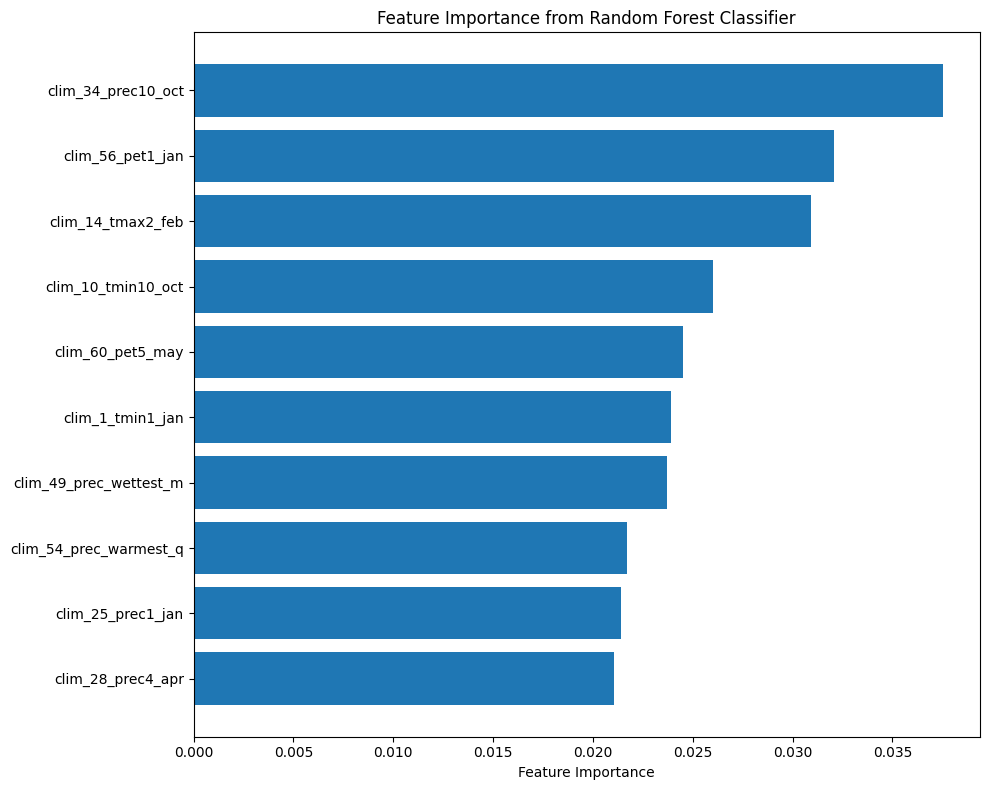

In [70]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Extract the feature names and their importance scores
feature_names = [feature for feature, importance in important_features]
importances = [importance for feature, importance in important_features]

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(feature_names)), importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.tight_layout()
plt.show()


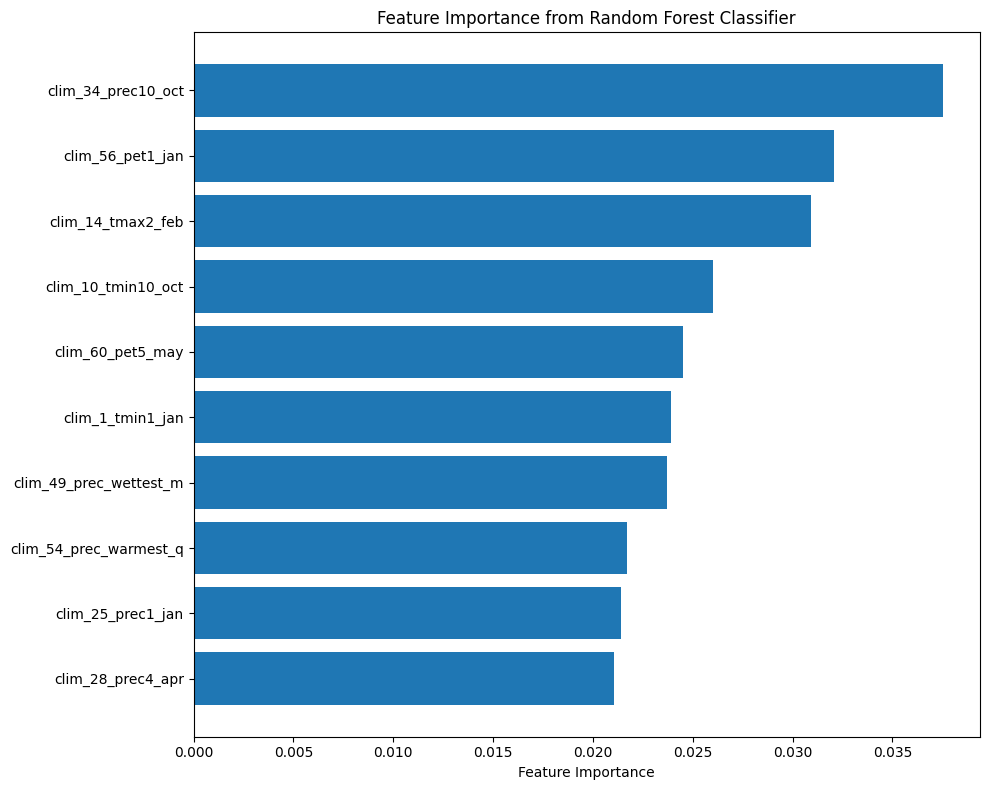

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'important_features' contains the sorted list of feature names and their importance scores
# Extract the feature names and their importance scores
feature_names = [feature for feature, importance in important_features]
importances = [importance for feature, importance in important_features]

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(feature_names)), importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.tight_layout()
plt.show()


Since many of the features are highly correlated, the importance of the the features can dilute feature importance scores, causing important features to seem less significant. 

Removing one feature from each highly correlated pair can lead to clearer and more accurate feature importance ranking

We will retrain the model after removing correlated features which may give us a better idea of which features are genuinely important for predicting caffeine class

In [77]:
import pandas as pd
import numpy as np

# Set the correlation threshold
threshold = 0.9

# Calculate the correlation matrix
correlation_matrix = coffee_data.drop(columns=['caffeine_class']).corr().abs()  # abs() for absolute values

# Create an empty list to store correlated pairs
correlated_pairs = []

# Create a mask to look at only the upper triangle of the correlation matrix (to avoid duplicates)
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Iterate through the upper triangle and identify correlated pairs
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i, j] > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlated_pairs.append((feature1, feature2))

# Print the correlated pairs
print(correlated_pairs)
correlated_pairs


[('clim_1_tmin1_jan', 'clim_2_tmin2_feb'), ('clim_1_tmin1_jan', 'clim_3_tmin3_mar'), ('clim_1_tmin1_jan', 'clim_4_tmin4_apr'), ('clim_1_tmin1_jan', 'clim_8_tmin8_aug'), ('clim_1_tmin1_jan', 'clim_9_tmin9_sep'), ('clim_1_tmin1_jan', 'clim_10_tmin10_oct'), ('clim_1_tmin1_jan', 'clim_11_tmin11_nov'), ('clim_1_tmin1_jan', 'clim_12_tmin12_dec'), ('clim_1_tmin1_jan', 'clim_37_ann_mean_temp'), ('clim_1_tmin1_jan', 'clim_45_tmean_driest_q'), ('clim_1_tmin1_jan', 'clim_47_tmean_coldest_q'), ('clim_1_tmin1_jan', 'clim_59_pet4_apr'), ('clim_1_tmin1_jan', 'clim_68_pet_annual'), ('clim_2_tmin2_feb', 'clim_3_tmin3_mar'), ('clim_2_tmin2_feb', 'clim_4_tmin4_apr'), ('clim_2_tmin2_feb', 'clim_9_tmin9_sep'), ('clim_2_tmin2_feb', 'clim_10_tmin10_oct'), ('clim_2_tmin2_feb', 'clim_11_tmin11_nov'), ('clim_2_tmin2_feb', 'clim_12_tmin12_dec'), ('clim_2_tmin2_feb', 'clim_45_tmean_driest_q'), ('clim_2_tmin2_feb', 'clim_58_pet3_mar'), ('clim_3_tmin3_mar', 'clim_4_tmin4_apr'), ('clim_3_tmin3_mar', 'clim_5_tmin5_ma

[('clim_1_tmin1_jan', 'clim_2_tmin2_feb'),
 ('clim_1_tmin1_jan', 'clim_3_tmin3_mar'),
 ('clim_1_tmin1_jan', 'clim_4_tmin4_apr'),
 ('clim_1_tmin1_jan', 'clim_8_tmin8_aug'),
 ('clim_1_tmin1_jan', 'clim_9_tmin9_sep'),
 ('clim_1_tmin1_jan', 'clim_10_tmin10_oct'),
 ('clim_1_tmin1_jan', 'clim_11_tmin11_nov'),
 ('clim_1_tmin1_jan', 'clim_12_tmin12_dec'),
 ('clim_1_tmin1_jan', 'clim_37_ann_mean_temp'),
 ('clim_1_tmin1_jan', 'clim_45_tmean_driest_q'),
 ('clim_1_tmin1_jan', 'clim_47_tmean_coldest_q'),
 ('clim_1_tmin1_jan', 'clim_59_pet4_apr'),
 ('clim_1_tmin1_jan', 'clim_68_pet_annual'),
 ('clim_2_tmin2_feb', 'clim_3_tmin3_mar'),
 ('clim_2_tmin2_feb', 'clim_4_tmin4_apr'),
 ('clim_2_tmin2_feb', 'clim_9_tmin9_sep'),
 ('clim_2_tmin2_feb', 'clim_10_tmin10_oct'),
 ('clim_2_tmin2_feb', 'clim_11_tmin11_nov'),
 ('clim_2_tmin2_feb', 'clim_12_tmin12_dec'),
 ('clim_2_tmin2_feb', 'clim_45_tmean_driest_q'),
 ('clim_2_tmin2_feb', 'clim_58_pet3_mar'),
 ('clim_3_tmin3_mar', 'clim_4_tmin4_apr'),
 ('clim_3_tmin3_

In [80]:
import pandas as pd
import numpy as np

# Set the correlation threshold
threshold = 0.9

# Assuming you have a DataFrame 'coffee_data' with features
# Drop the target column (e.g., 'caffeine_class') to calculate correlations between features
correlation_matrix = coffee_data.drop(columns=['caffeine_class']).corr().abs()

# Create a list to store the correlated pairs
correlated_pairs = []

# Create an upper triangle matrix to avoid duplicate comparisons
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Identify pairs of correlated features above the threshold
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if correlation_matrix.iloc[i, j] > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlated_pairs.append((feature1, feature2))

# Assuming you have already calculated feature importance scores using RandomForest or another model
# feature_importance_dict contains {feature_name: importance_score}
# Example: {'temperature': 0.12, 'latitude': 0.08, ... }

# Compare feature importance and decide which correlated feature to keep
for feature1, feature2 in correlated_pairs:
    if feature_importance_dict[feature1] > feature_importance_dict[feature2]:
        print(f"Keeping {feature1}, discarding {feature2}")
    else:
        print(f"Keeping {feature2}, discarding {feature1}")



Keeping clim_1_tmin1_jan, discarding clim_2_tmin2_feb
Keeping clim_1_tmin1_jan, discarding clim_3_tmin3_mar
Keeping clim_1_tmin1_jan, discarding clim_4_tmin4_apr
Keeping clim_1_tmin1_jan, discarding clim_8_tmin8_aug
Keeping clim_1_tmin1_jan, discarding clim_9_tmin9_sep
Keeping clim_10_tmin10_oct, discarding clim_1_tmin1_jan
Keeping clim_1_tmin1_jan, discarding clim_11_tmin11_nov
Keeping clim_1_tmin1_jan, discarding clim_12_tmin12_dec
Keeping clim_1_tmin1_jan, discarding clim_37_ann_mean_temp
Keeping clim_1_tmin1_jan, discarding clim_45_tmean_driest_q
Keeping clim_1_tmin1_jan, discarding clim_47_tmean_coldest_q
Keeping clim_1_tmin1_jan, discarding clim_59_pet4_apr
Keeping clim_1_tmin1_jan, discarding clim_68_pet_annual
Keeping clim_2_tmin2_feb, discarding clim_3_tmin3_mar
Keeping clim_2_tmin2_feb, discarding clim_4_tmin4_apr
Keeping clim_9_tmin9_sep, discarding clim_2_tmin2_feb
Keeping clim_10_tmin10_oct, discarding clim_2_tmin2_feb
Keeping clim_11_tmin11_nov, discarding clim_2_tmin2_fe

In [81]:
# Compare variance of correlated features
for feature1, feature2 in correlated_pairs:
    if coffee_data[feature1].var() > coffee_data[feature2].var():
        # Keep feature1, discard feature2
        print(f"Keeping {feature1}, discarding {feature2} (higher variance)")
    else:
        # Keep feature2, discard feature1
        print(f"Keeping {feature2}, discarding {feature1} (higher variance)")


Keeping clim_1_tmin1_jan, discarding clim_2_tmin2_feb (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_3_tmin3_mar (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_4_tmin4_apr (higher variance)
Keeping clim_8_tmin8_aug, discarding clim_1_tmin1_jan (higher variance)
Keeping clim_9_tmin9_sep, discarding clim_1_tmin1_jan (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_10_tmin10_oct (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_11_tmin11_nov (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_12_tmin12_dec (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_37_ann_mean_temp (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_45_tmean_driest_q (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_47_tmean_coldest_q (higher variance)
Keeping clim_1_tmin1_jan, discarding clim_59_pet4_apr (higher variance)
Keeping clim_68_pet_annual, discarding clim_1_tmin1_jan (higher variance)
Keeping clim_3_tmin3_mar, discarding c

In [35]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 3.0 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.8 MB 3.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 4.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 5.2 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 5.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 5.5 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = coffee_data.drop(columns=['caffeine_class'])  # Assuming caffeine_class is the target variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                     feature           VIF
0           clim_1_tmin1_jan  3.915283e+05
1           clim_2_tmin2_feb  7.531714e+05
2           clim_3_tmin3_mar  6.989463e+05
3           clim_4_tmin4_apr  3.181418e+05
4           clim_5_tmin5_may  3.080130e+05
5           clim_6_tmin6_jun  1.874330e+05
6           clim_7_tmin7_jul  2.710964e+05
7           clim_8_tmin8_aug  3.131730e+05
8           clim_9_tmin9_sep  3.109759e+05
9         clim_10_tmin10_oct  3.677723e+05
10        clim_11_tmin11_nov  8.118863e+05
11        clim_12_tmin12_dec  5.677003e+05
12         clim_13_tmax1_jan  9.684017e+05
13         clim_14_tmax2_feb  1.205058e+06
14         clim_15_tmax3_mar  1.533846e+06
15         clim_16_tmax4_apr  8.930520e+05
16         clim_17_tmax5_may  5.181503e+05
17         clim_18_tmax6_jun  4.540305e+05
18         clim_19_tmax7_jul  7.454544e+05
19         clim_20_tmax8_aug  7.205510e+05
20         clim_21_tmax9_sep  5.507788e+05
21        clim_22_tmax10_oct  9.314783e+05
22        c

In [83]:
# Filter the vif_data DataFrame to show only rows where VIF is infinity (inf)
inf_vif_features = vif_data[vif_data['VIF'] == float('inf')]

# Display the features with VIF = inf
print(inf_vif_features)


                   feature  VIF
24       clim_25_prec1_jan  inf
25       clim_26_prec2_feb  inf
26       clim_27_prec3_mar  inf
27       clim_28_prec4_apr  inf
28       clim_29_prec5_may  inf
29       clim_30_prec6_jun  inf
30       clim_31_prec7_jul  inf
31       clim_32_prec8_aug  inf
32       clim_33_prec9_sep  inf
33      clim_34_prec10_oct  inf
34      clim_35_prec11_nov  inf
35      clim_36_prec12_dec  inf
40  clim_41_tmax_warmest_m  inf
41  clim_42_tmin_coldest_m  inf
42   clim_43_tannual_range  inf
47     clim_48_Annual_prec  inf


In [ ]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = coffee_data.drop(columns=['caffeine_class']).corr()

# Create a mask to get the upper triangle of the correlation matrix (to avoid duplicates)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with a correlation coefficient greater than 0.9
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > 0.9)]

# Drop the highly correlated features
reduced_data = coffee_data.drop(columns=highly_correlated_features)

# Display the reduced dataset shape
print(f"Original dataset shape: {coffee_data.shape}")
print(f"Reduced dataset shape (after removing highly correlated features): {reduced_data.shape}")
